# Algoritmos de optimización - Reto 2

Nombre: Ana Paula Aravena Cifuentes<br>
Github: https://github.com/rainamelui/03MIAR---Algoritmos-de-Optimizacion--2024 <br>

## Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

### Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

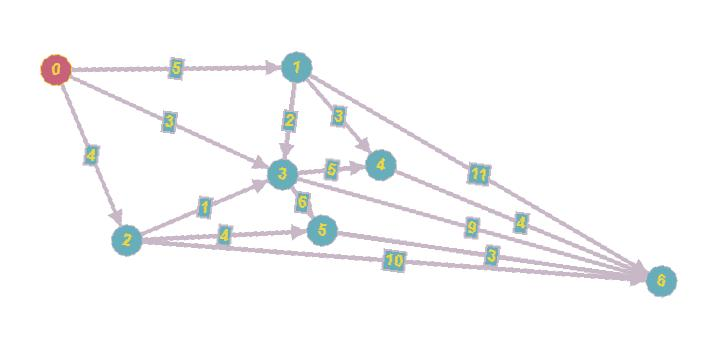

* Resuelve el problema del descenso por el rio utilizando la técnica de optimización que consideres más adecuada.

In [13]:
def viaje_por_el_rio(grafo, primer_nodo, ultimo_nodo):
    n = len(grafo)
    distancias = [[float('inf')] * n for _ in range(n)]

    # Inicializar distancias
    for i in range(n):
        for j in range(n):
            if i == j:
                distancias[i][j] = 0
            elif grafo[i][j] is not None:
                distancias[i][j] = grafo[i][j]

    #distancias mínimas
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if distancias[i][k] + distancias[k][j] < distancias[i][j]:
                    distancias[i][j] = distancias[i][k] + distancias[k][j]
    
    print(f"El costo de llegar del nodo {primer_nodo} al nodo {ultimo_nodo}: {distancias[primer_nodo][ultimo_nodo]}")
    return distancias

graph = [
    [0, 5, 4, 3, None, None, None],
    [None, 0, None, 2, 3, None, 11],
    [None, None, 0, 1, None, 4, 10],
    [None, None, None, 0, 5, 6, 9],
    [None, None, None, None, 0, None, 4],
    [None, None, None, None, None, 0, 3],
    [None, None, None, None, None, None, 0]
]

dist_1=viaje_por_el_rio(graph, 0,4)
dist_2=viaje_por_el_rio(graph, 0,6)
dist_3=viaje_por_el_rio(graph, 4,6)

El costo de llegar del nodo 0 al nodo 4: 8
El costo de llegar del nodo 0 al nodo 6: 11
El costo de llegar del nodo 4 al nodo 6: 4


## Descenso del gradiente

In [ ]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [ ]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

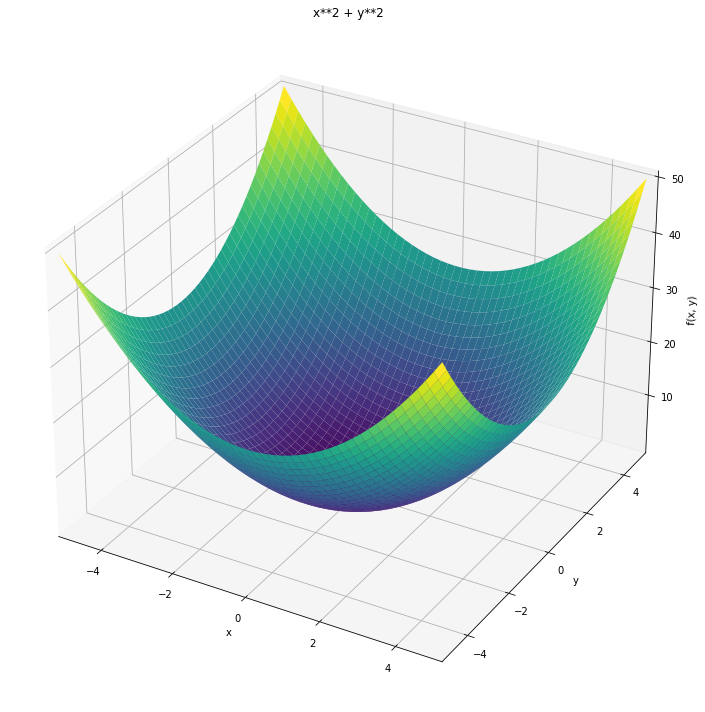

In [ ]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

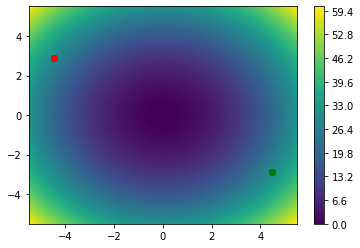

Solucion: [4.472126877392311, -2.888208824237993] 28.341669019900912


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=1

#Iteraciones:50
for _ in range(1000):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


## Reto

Optimizar la función siguiente mediante el algoritmo por descenso del gradiente.

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
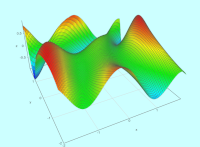


In [ ]:
#Definimos la funcion
import math
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )

In [ ]:
df = lambda X: [X[0] * math.cos(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * math.cos(2*X[0] + 1 - math.exp(X[1])) - 2 * math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * math.sin(2*X[0] + 1 - math.exp(X[1])),1/2 * X[1] * math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * math.sin(2*X[0] + 1 - math.exp(X[1])) - math.cos(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * math.exp(X[1]) * math.sin(2*X[0] + 1 - math.exp(X[1]))]


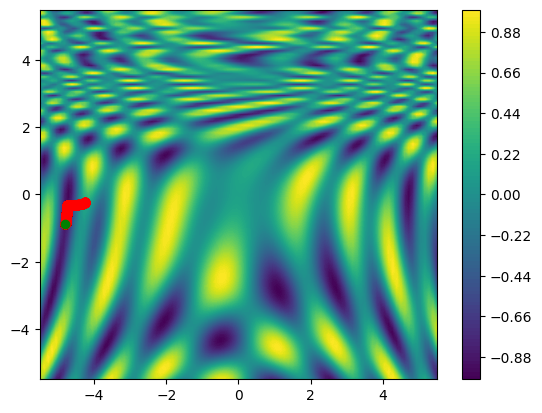

Solucion: [-4.797735113082865, -0.8807691895470647] -0.9007151336598698


In [ ]:
resolucion = 100
rango = 5.5
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[iy, ix] = f([x, y])

plt.contourf(X, Y, Z, resolucion)
plt.colorbar()

P = [random.uniform(-5, 5), random.uniform(-5, 5)]
plt.plot(P[0], P[1], "o", c="white")

TA = 0.001

for _ in range(10000):
    grad = df(P)
    P[0], P[1] = P[0] - TA * grad[0], P[1] - TA * grad[1]
    plt.plot(P[0], P[1], "o", c="red")

plt.plot(P[0], P[1], "o", c="green")
plt.show()

print("Solucion:", P, f(P))
